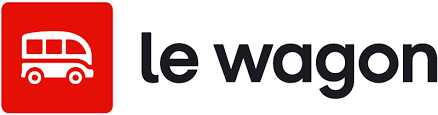

# Data access - APIs

In [2]:
import requests
from bs4 import BeautifulSoup

# response = requests.method(url, params=params, headers=headers)

# method -> to be replaced by a REST verb
# -"GET"
# -"POST"
# -"PUT"
# -"DELETE"

In [3]:
url = "https://api.github.com/users/julioeq29"

response = requests.get(url) #, params=params, headers=headers)

# url requested to check it is ok
response.url

'https://api.github.com/users/julioeq29'

In [4]:
# request status code
response.status_code

200

In [5]:
# query results in string format (hard to use)
response.text

'{"login":"julioeq29","id":44930318,"node_id":"MDQ6VXNlcjQ0OTMwMzE4","avatar_url":"https://avatars.githubusercontent.com/u/44930318?v=4","gravatar_id":"","url":"https://api.github.com/users/julioeq29","html_url":"https://github.com/julioeq29","followers_url":"https://api.github.com/users/julioeq29/followers","following_url":"https://api.github.com/users/julioeq29/following{/other_user}","gists_url":"https://api.github.com/users/julioeq29/gists{/gist_id}","starred_url":"https://api.github.com/users/julioeq29/starred{/owner}{/repo}","subscriptions_url":"https://api.github.com/users/julioeq29/subscriptions","organizations_url":"https://api.github.com/users/julioeq29/orgs","repos_url":"https://api.github.com/users/julioeq29/repos","events_url":"https://api.github.com/users/julioeq29/events{/privacy}","received_events_url":"https://api.github.com/users/julioeq29/received_events","type":"User","user_view_type":"public","site_admin":false,"name":"Julio Quintana","company":null,"blog":"","loca

In [7]:
github_user = response.json()
github_user

{'login': 'julioeq29',
 'id': 44930318,
 'node_id': 'MDQ6VXNlcjQ0OTMwMzE4',
 'avatar_url': 'https://avatars.githubusercontent.com/u/44930318?v=4',
 'gravatar_id': '',
 'url': 'https://api.github.com/users/julioeq29',
 'html_url': 'https://github.com/julioeq29',
 'followers_url': 'https://api.github.com/users/julioeq29/followers',
 'following_url': 'https://api.github.com/users/julioeq29/following{/other_user}',
 'gists_url': 'https://api.github.com/users/julioeq29/gists{/gist_id}',
 'starred_url': 'https://api.github.com/users/julioeq29/starred{/owner}{/repo}',
 'subscriptions_url': 'https://api.github.com/users/julioeq29/subscriptions',
 'organizations_url': 'https://api.github.com/users/julioeq29/orgs',
 'repos_url': 'https://api.github.com/users/julioeq29/repos',
 'events_url': 'https://api.github.com/users/julioeq29/events{/privacy}',
 'received_events_url': 'https://api.github.com/users/julioeq29/received_events',
 'type': 'User',
 'user_view_type': 'public',
 'site_admin': False,

In [17]:
type(github_user)

dict

In [9]:
# query results in a dictionary (easy to use)
github_user['following']

2

# Web scraping with code

In [11]:
url = "https://www.perdu.com/"
response = requests.get(url)

In [13]:
response.text

"<html><head><title>Vous Etes Perdu ?</title></head><body><h1>Perdu sur l'Internet ?</h1><h2>Pas de panique, on va vous aider</h2><strong><pre>    * <----- vous &ecirc;tes ici</pre></strong></body></html>\n"

In [15]:

# soup can now be query to extract content
soup = BeautifulSoup(response.text, 'html.parser')
soup

<html><head><title>Vous Etes Perdu ?</title></head><body><h1>Perdu sur l'Internet ?</h1><h2>Pas de panique, on va vous aider</h2><strong><pre>    * &lt;----- vous êtes ici</pre></strong></body></html>

In [16]:
type(soup)

bs4.BeautifulSoup

In [18]:
# search for tag h1
tag_h2 = soup.find("h2")

# extract content
print(tag_h2.text) # welcome to web scraping class

Pas de panique, on va vous aider


Example with IMDB :

In [ ]:
response = requests.get("https://www.allocine.fr/film/meilleurs/")
soup = BeautifulSoup(response.content, "html.parser")
soup

In [23]:
response.text

'<html>\r\n<head><title>403 Forbidden</title></head>\r\n<body>\r\n<center><h1>403 Forbidden</h1></center>\r\n</body>\r\n</html>\r\n'

In [29]:
movies = soup.find_all('h2', class_='meta-title')
top15 = []
for movie in movies:
    top15.append(movie.text.strip())
'''
<h2 class="meta-title">
<a class="meta-title-link" href="/film/fichefilm_gen_cfilm=9393.html">La Liste de Schindler</a>
</h2>
'''
top15

['Forrest Gump',
 'La Liste de Schindler',
 'La Ligne verte',
 '12 hommes en colère',
 'Le Parrain',
 'Les Evadés',
 'Le Seigneur des anneaux : le retour du roi',
 "Vol au-dessus d'un nid de coucou",
 'Le Comte de Monte-Cristo',
 'Le Roi Lion']

In [ ]:
movies = []
for movie in soup.find_all("div", class_="lister-item-content"):
    title = movie.find("h3").find("a").string
    duration = int(movie.find("span", class_="runtime").string.strip(' min'))
    movies.append({'title': title, 'duration': duration})

print(movies[0:2])